In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp
import scipy as sp

In [10]:
def H(x,p):
    return p**2/2 + x**2/2

# Verlet algorithm

In [24]:
x_sol = np.zeros(10001)
p_sol = np.zeros(10001)

x0 = 1
p0 = -1.7

x = x0
p = p0

def f_i(x):
    
    return -x

dt = 0.01

for i in np.arange(10001):
    
    x_1 = x + p*dt + f_i(x)*dt**2/2
    p = p + (f_i(x) + f_i(x_1))*dt/2
    x = x_1
    x_sol[i] = x
    p_sol[i] = p
    

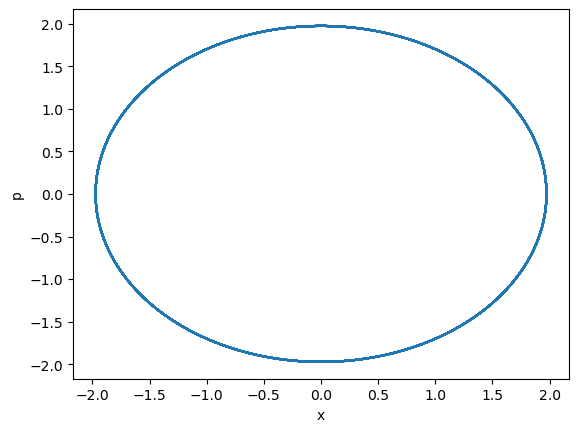

In [25]:
plt.figure()
plt.xlabel("x")
plt.ylabel("p")
plt.plot(x_sol,p_sol);

In [23]:
H_evolve = []

for i in np.arange(len(x_sol)):
    
    H_evolve.append(H(x_sol[i],p_sol[i]))

H_evolve

[57.74499746699627,
 57.74499521873078,
 57.74499325610282,
 57.744991579897416,
 57.74499019078503,
 57.744989089321294,
 57.7449882759468,
 57.74498775098685,
 57.74498751465146,
 57.74498756703514,
 57.744987908116954,
 57.744988537760456,
 57.7449894557138,
 57.74499066160982,
 57.744992154966155,
 57.7449939351855,
 57.744996001555755,
 57.74499835325042,
 57.74500098932884,
 57.745003908736585,
 57.74500711030594,
 57.7450105927563,
 57.74501435469473,
 57.74501839461649,
 57.745022710905644,
 57.74502730183575,
 57.745032165570436,
 57.74503730016428,
 57.74504270356349,
 57.74504837360677,
 57.74505430802615,
 57.74506050444792,
 57.74506696039359,
 57.74507367328084,
 57.74508064042456,
 57.745087859037994,
 57.74509532623375,
 57.74510303902503,
 57.745110994326794,
 57.745119188957,
 57.74512761963788,
 57.745136282997244,
 57.74514517556983,
 57.7451542937987,
 57.74516363403665,
 57.74517319254768,
 57.745182965508484,
 57.745192949010004,
 57.745203139058894,
 57.74521353

# Just using second order taylor series to estimate next step

In [77]:
x_sols = []
p_sols = []

x0 = 1
p0 = 0.1

x = x0
p = p0

dt = 0.01

for i in np.arange(1001):
    
    x_dt = x + p*dt - x*dt**2/2
    p_dt = p - x*dt - p*dt**2/2
    x = x_dt
    p = p_dt
    x_sols.append(x)
    p_sols.append(p)

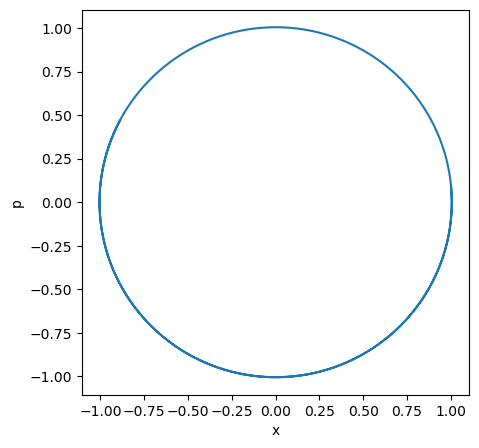

In [78]:
plt.figure(figsize = (5,5))
plt.xlabel("x")
plt.ylabel("p")
plt.plot(x_sols,p_sols);

In [81]:
H_evolve = []

for i in np.arange(len(x_sols)):
    
    H_evolve.append(H(x_sols[i],p_sols[i]))

H_evolve

[0.5050000012624998,
 0.5050000025249998,
 0.5050000037874997,
 0.5050000050499998,
 0.5050000063124997,
 0.5050000075749997,
 0.5050000088374998,
 0.5050000100999997,
 0.5050000113624998,
 0.5050000126249999,
 0.5050000138875,
 0.5050000151499999,
 0.5050000164125001,
 0.5050000176750001,
 0.5050000189375,
 0.5050000201999999,
 0.5050000214625001,
 0.5050000227249999,
 0.5050000239875001,
 0.5050000252500001,
 0.5050000265125003,
 0.5050000277750004,
 0.5050000290375004,
 0.5050000303000004,
 0.5050000315625004,
 0.5050000328250005,
 0.5050000340875006,
 0.5050000353500006,
 0.5050000366125007,
 0.5050000378750008,
 0.5050000391375008,
 0.5050000404000009,
 0.505000041662501,
 0.5050000429250011,
 0.5050000441875012,
 0.5050000454500014,
 0.5050000467125016,
 0.5050000479750018,
 0.5050000492375017,
 0.505000050500002,
 0.5050000517625021,
 0.5050000530250023,
 0.5050000542875024,
 0.5050000555500024,
 0.5050000568125025,
 0.5050000580750027,
 0.5050000593375029,
 0.5050000606000031,


# Using odeint

In [17]:
def dSdx(t, S):
    x, p = S
    return [p,-x]

x0 = 100
p0 = -6
S_0 = [x0,p0]

In [18]:
t = np.linspace(0,10,1000)
sol = sp.integrate.odeint(dSdx, y0 = S_0, t=t, tfirst = True)
sol = sol.T

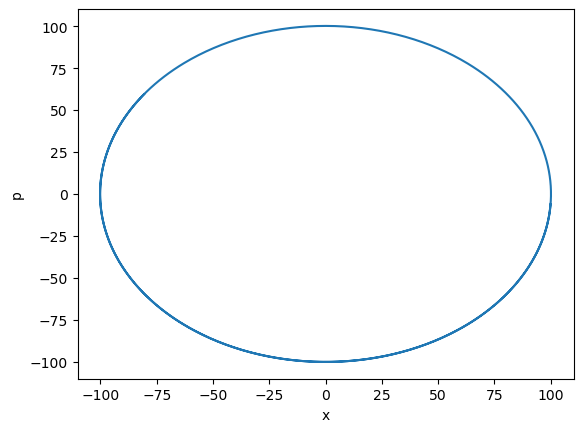

In [19]:
plt.xlabel("x")
plt.ylabel("p")
plt.plot(sol[0],sol[1]);

In [26]:
for i in np.arange(1000):
    print(H(sol[0][i],sol[1][i]))

5018.0
5017.999999998983
5018.000000124344
5018.000001539824
5018.000006135659
5018.000007932372
5018.00000474246
5017.999999352236
5017.999998471484
5017.999998485063
5017.999998500929
5017.999998503431
5017.999998532506
5017.999998535946
5017.999998567228
5017.999998593501
5017.999998583936
5017.999998553394
5017.999998508759
5017.9999984559
5017.999998164011
5017.999997683889
5017.999997420799
5017.999997369968
5017.9999972341
5017.99999708408
5017.99999704386
5017.999996936668
5017.999996768016
5017.999996676564
5017.999996624972
5017.999996492891
5017.999996351419
5017.99999630732
5017.999996218058
5017.999996063042
5017.999995971683
5017.999995249379
5017.9999931657585
5017.999989608584
5017.999984636884
5017.999978529499
5017.999971832458
5017.99996540521
5017.999960465684
5017.999958617301
5017.99995876384
5017.999959333047
5017.999960403911
5017.999962000061
5017.999964062605
5017.99996642009
5017.9999687557965
5017.999970572663
5017.999971162984
5017.999971358042
5017.9999722